In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
import tensorflow as tf
import imageio
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense
import tensorflow.keras as keras

In [3]:
# get the images and their corresponding labels

train_dataset_path = Path("/kaggle/input/alzheimer-diseases-3-class/3_cls/train")
training_images = list(train_dataset_path.glob(r'**/*.png'))
training_labels = list(map(lambda x: x.parents[0].stem, training_images))

#Test Dataset
test_dataset_path = Path("/kaggle/input/alzheimer-diseases-3-class/3_cls/test")
test_images = list(test_dataset_path.glob(r'**/*.png'))
test_labels = list(map(lambda x: x.parents[0].stem, test_images))

In [4]:
training_images = pd.Series(training_images, name="Images").astype(str)
training_labels = pd.Series(training_labels, name="Labels").astype(str)

In [5]:
test_images = pd.Series(test_images, name="Images").astype(str)
test_labels = pd.Series(test_labels, name="Labels").astype(str)

In [6]:
training_data = pd.concat([training_images, training_labels], axis = 1)
training_data = training_data.sample(frac = 1, random_state = 42).reset_index(drop = True)
training_data

,Images,Labels
0,/kaggle/input/alzheimer-diseases-3-class/3_cls...,CONTROL
1,/kaggle/input/alzheimer-diseases-3-class/3_cls...,CONTROL
2,/kaggle/input/alzheimer-diseases-3-class/3_cls...,PD
3,/kaggle/input/alzheimer-diseases-3-class/3_cls...,CONTROL
4,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD
...,...,...
6472,/kaggle/input/alzheimer-diseases-3-class/3_cls...,PD
6473,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD
6474,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD
6475,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD


In [7]:
test_data = pd.concat([test_images, test_labels], axis = 1)
test_data = test_data.sample(frac = 1, random_state = 42).reset_index(drop = True)
test_data

,Images,Labels
0,/kaggle/input/alzheimer-diseases-3-class/3_cls...,CONTROL
1,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD
2,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD
3,/kaggle/input/alzheimer-diseases-3-class/3_cls...,CONTROL
4,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD
...,...,...
1357,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD
1358,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD
1359,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD
1360,/kaggle/input/alzheimer-diseases-3-class/3_cls...,AD


/tmp/ipykernel_42/3679256976.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ax.imshow(imageio.imread(training_data.Images[i]))


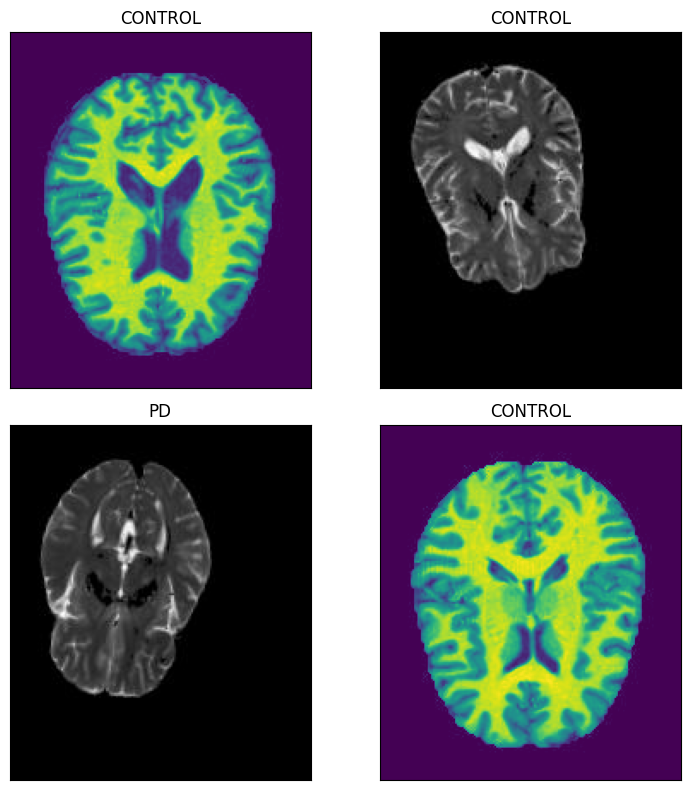

In [8]:
 #Viewing some of the images in the dataframe
fig, axes = plt.subplots(2, 2, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(imageio.imread(training_data.Images[i]))
    ax.set_title(training_data.Labels[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import mobilenet

train_generator_mobile_net = ImageDataGenerator(
    preprocessing_function = mobilenet.preprocess_input,
    validation_split = 0.1
)

test_generator_mobile_net = ImageDataGenerator(
    preprocessing_function = mobilenet.preprocess_input
)

In [10]:
from sklearn.model_selection import train_test_split

train_df = training_data.copy()
test_df = test_data.copy()

train = train_generator_mobile_net.flow_from_dataframe(
    dataframe=train_df,
    x_col="Images",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training',
    rotation_range=32,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    sheer_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5,1.5],
    fill_mode="nearest"
)

validation = train_generator_mobile_net.flow_from_dataframe(
    dataframe=train_df,
    x_col="Images",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation',
    rotation_range=32,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    sheer_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5,1.5],
    fill_mode="nearest"
)

test = test_generator_mobile_net.flow_from_dataframe(
    dataframe=test_df,
    x_col="Images",
    y_col="Labels",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    rotation_range=32,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shuffle=False
)

Found 5830 validated image filenames belonging to 3 classes.
Found 647 validated image filenames belonging to 3 classes.
Found 1362 validated image filenames belonging to 3 classes.


In [11]:
# for the convolutional network
from keras import __version__ as keras_version
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras import losses
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing import image
#from keras.utils import np_utils
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

In [12]:
model = keras.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [13]:
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()]
)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

print("--> Checking for physical Tensorflow devices")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

--> Checking for physical Tensorflow devices
: /physical_device:CPU:0


In [15]:
with tf.device('/GPU:0'):

    results = model.fit(
        train,
        validation_data = validation,
        batch_size = 32,
        epochs = 10,
        callbacks = [EarlyStopping(
            monitor="val_loss",
            patience=4,
            restore_best_weights=True
        ), ReduceLROnPlateau(patience=2)]
    )

Epoch 1/10
183/183 [==============================] - 284s 2s/step - loss: 0.8048 - categorical_accuracy: 0.6612 - val_loss: 0.5921 - val_categorical_accuracy: 0.6909 - lr: 0.0010
Epoch 2/10
183/183 [==============================] - 279s 2s/step - loss: 0.5093 - categorical_accuracy: 0.7456 - val_loss: 0.4798 - val_categorical_accuracy: 0.7929 - lr: 0.0010
Epoch 3/10
183/183 [==============================] - 282s 2s/step - loss: 0.3467 - categorical_accuracy: 0.8415 - val_loss: 0.3101 - val_categorical_accuracy: 0.8563 - lr: 0.0010
Epoch 4/10
183/183 [==============================] - 282s 2s/step - loss: 0.2060 - categorical_accuracy: 0.9129 - val_loss: 0.2325 - val_categorical_accuracy: 0.9026 - lr: 0.0010
Epoch 5/10
183/183 [==============================] - 281s 2s/step - loss: 0.1171 - categorical_accuracy: 0.9537 - val_loss: 0.1982 - val_categorical_accuracy: 0.9274 - lr: 0.0010
Epoch 6/10
183/183 [==============================] - 282s 2s/step - loss: 0.0518 - categorical_accu

In [16]:
# Testing the model
evaluation = model.evaluate(test)

43/43 [==============================] - 19s 433ms/step - loss: 1.2659 - categorical_accuracy: 0.6725


In [17]:
predictions = np.argmax(model.predict(test), axis=1)

43/43 [==============================] - 19s 442ms/step


In [18]:
from sklearn.metrics import classification_report
labels = dict((v, k) for k, v in train.class_indices.items())
actual = list(test_df.Labels)
predictions = [labels[i] for i in predictions]
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          AD       0.66      0.76      0.71       639
     CONTROL       0.68      0.61      0.65       662
          PD       0.88      0.36      0.51        61

    accuracy                           0.67      1362
   macro avg       0.74      0.58      0.62      1362
weighted avg       0.68      0.67      0.67      1362



In [19]:
from io import StringIO
import pandas as pd

labels = ['CONTROL', 'AD', 'PD']
# Get classification report as a string
report_str = classification_report(actual, predictions, target_names = labels)

# Read the classification report string into a Pandas DataFrame
cls_df = pd.read_csv(StringIO(report_str), sep='\s{2,}', engine='python', skipfooter=3)
cls_df

,precision,recall,f1-score,support
CONTROL,0.66,0.76,0.71,639
AD,0.68,0.61,0.65,662
PD,0.88,0.36,0.51,61


In [20]:
from io import BytesIO
# Plot DataFrame as a table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Turn off the axis
table = ax.table(cellText=cls_df.values, colLabels=cls_df.columns, rowLabels=cls_df.index, loc='center', cellLoc='center', colColours=['#f2f2f2']*len(cls_df.columns))

# Save the figure as an image
image_stream = BytesIO()
plt.savefig(image_stream, format='png', bbox_inches='tight', pad_inches=0.5)
plt.close()  # Close the plot to avoid displaying it

# Display the image or save it to a file
# For example, to save it to a file:
image_stream.seek(0)
with open('cnn_cls_df.png', 'wb') as f:
    f.write(image_stream.read())

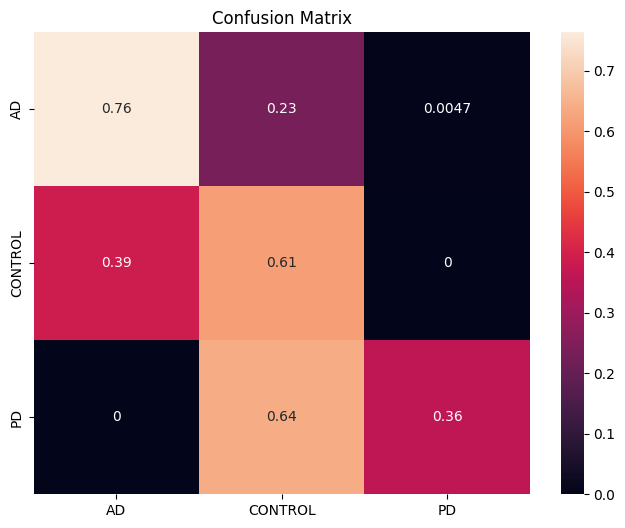

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(actual, predictions, normalize = "true")
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, xticklabels = sorted(set(actual)), yticklabels = sorted(set(actual)))
plt.title('Confusion Matrix')
plt.show()

In [32]:
cf

array([[0.76369327, 0.23161189, 0.00469484],
       [0.38670695, 0.61329305, 0.        ],
       [0.        , 0.63934426, 0.36065574]])

In [22]:
plt.style.use('fivethirtyeight')

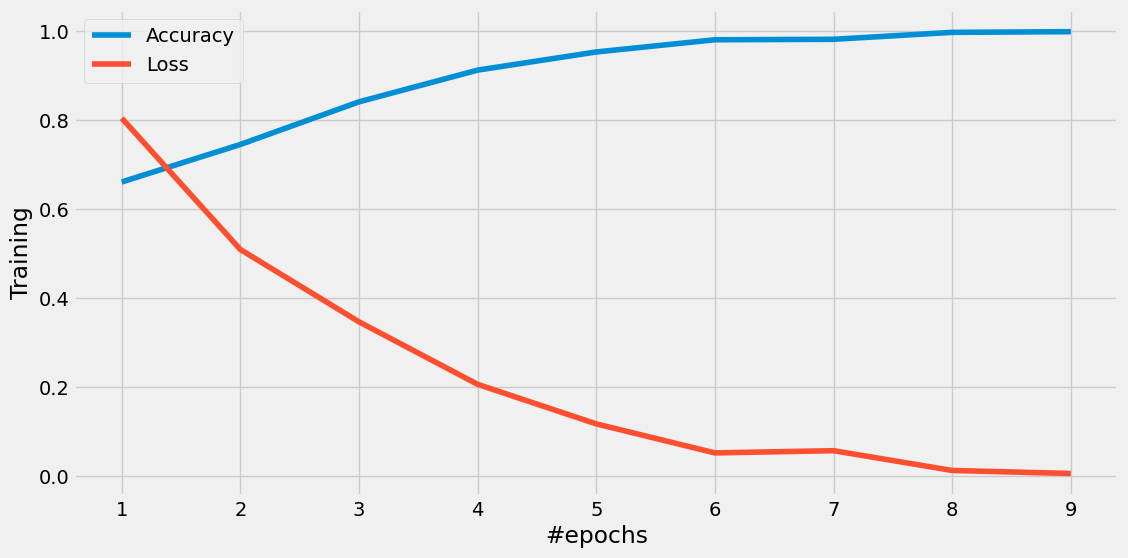

In [23]:
history = results
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['categorical_accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend();

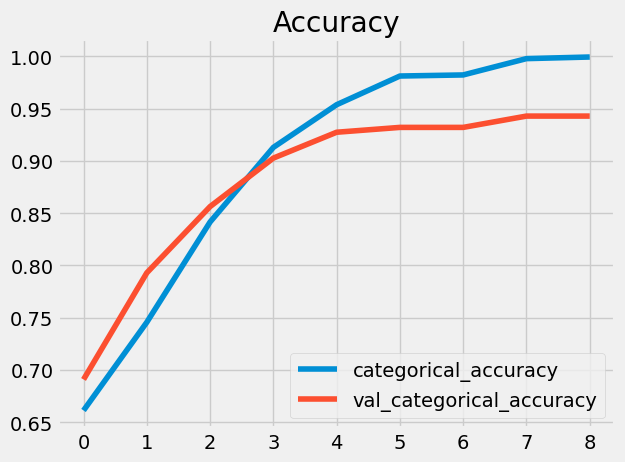

In [24]:
pd.DataFrame(history.history)[['categorical_accuracy', 'val_categorical_accuracy']].plot()
plt.title("Accuracy")
plt.show()

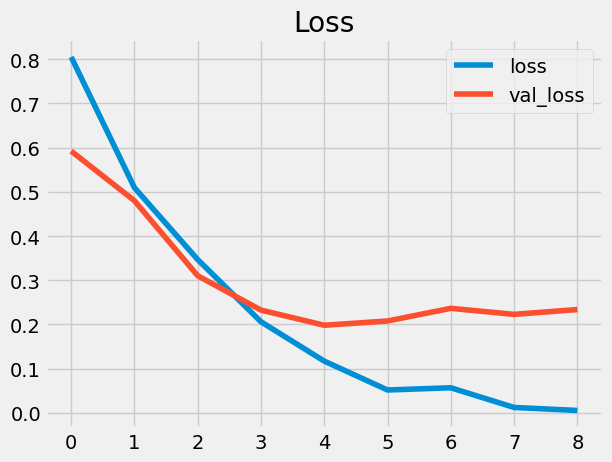

In [25]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [26]:
# Metrics 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score

In [27]:
print("precision: ",precision_score(actual, predictions, average = "weighted"))
print("recall: ",recall_score(actual, predictions, average = "weighted") )
print("f1_score: ",f1_score(actual, predictions, average = "weighted"))
print("accuracy_score: ", accuracy_score(actual, predictions))

precision:  0.6799193678191631
recall:  0.6725403817914831
f1_score:  0.6684884898208875
accuracy_score:  0.6725403817914831


In [28]:
cmat = confusion_matrix(actual, predictions)
classwise_acc = cmat.diagonal()/cmat.sum(axis=1) * 100 
cls_acc = pd.DataFrame({'Class_Label':[labels[i] for i in range(3)], 'Accuracy': classwise_acc.tolist()}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).bar(subset=["Accuracy"], color='tomato')

,Class_Label,Accuracy
0,CONTROL,76.37
1,AD,61.33
2,PD,36.07


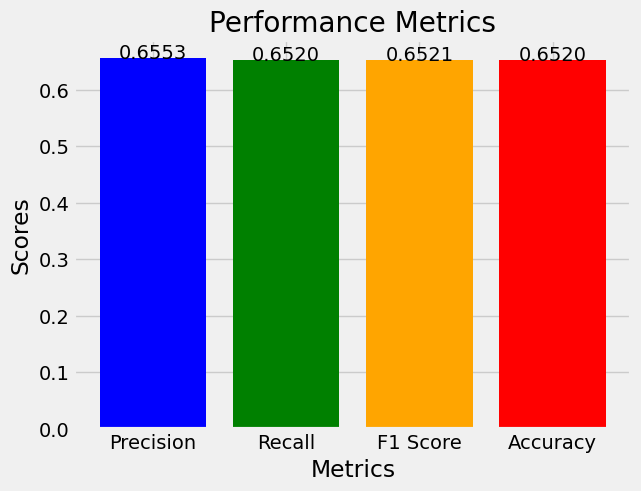

In [29]:
import matplotlib.pyplot as plt

# Data
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [0.6553,0.6520,0.6521,0.6520]

# Plotting the bar graph
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics')

# Display the scores on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.0001, f'{score:.4f}', ha='center')

# Show the plot
plt.show()



## Comparative Analysis

In [30]:
precision:  0.9709
recall:  0.9707
f1_score:  0.9705
accuracy_score:  0.9707


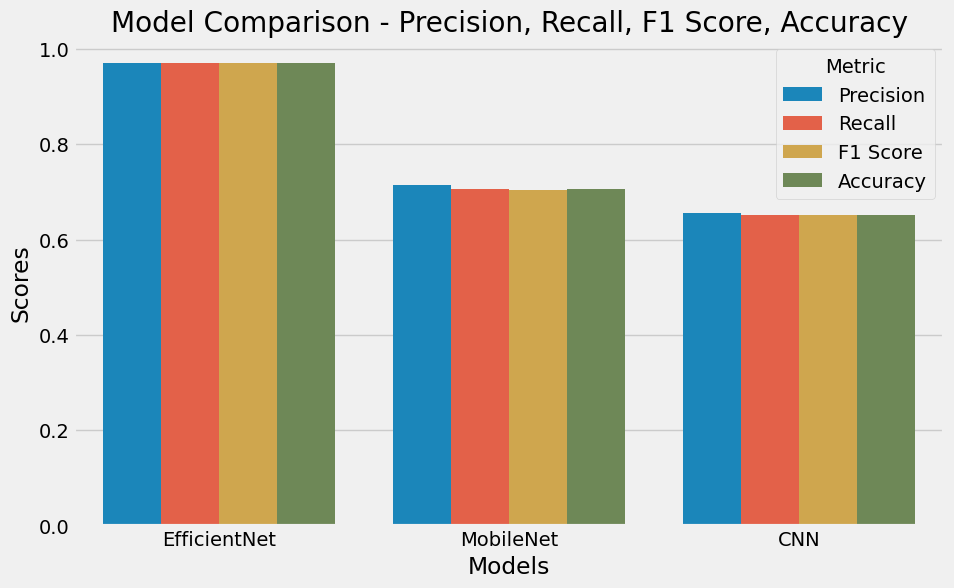

In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Model': ['EfficientNet', 'MobileNet', 'CNN'],
    'Precision': [0.9709, 0.7136, 0.6553],
    'Recall': [0.9707, 0.7070, 0.6519],
    'F1 Score': [0.9705, 0.7043, 0.6521],
    'Accuracy': [0.9707, 0.7070, 0.6520],
}

df = pd.DataFrame(data)

# Melt the DataFrame to long format for Seaborn
df_melted = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Score')

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, )

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison - Precision, Recall, F1 Score, Accuracy')

# Show the plot
plt.show()
